In [1]:
#import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# download and split the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("training data = ", x_train.shape)
print("testing data = ", x_test.shape)

training data =  (50000, 32, 32, 3)
testing data =  (10000, 32, 32, 3)


In [4]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [6]:
# build the model

# number of hidden units variable 
# we are declaring this variable here and use it in our CONV layers to make it easier to update from one place
base_hidden_units = 32

# l2 regularization hyperparameter
weight_decay = 1e-4 

def sample_model():
  # instantiate an empty sequential model 
  model = Sequential()

  # CONV1
  # notice that we defined the input_shape here because this is the first CONV layer. 
  # we don’t need to do that for the remaining layers
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV2
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # CONV3
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV4
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # FC7
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

model = sample_model()
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [7]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

# compute the data augmentation on the training set
datagen.fit(x_train)

In [8]:
# self.model.optimizer.learning_rate
from tensorflow import keras
class print_lr(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    
    print(f'Epoch {epoch}, the optimizer state is {self.model.optimizer.get_config()}')

In [9]:
def custom_model():
  # instantiate an empty sequential model 
  model = Sequential()

  # CONV1
  # notice that we defined the input_shape here because this is the first CONV layer. 
  # we don’t need to do that for the remaining layers
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV2
  model.add(Conv2D(base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # CONV3
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # CONV4
  model.add(Conv2D(2*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # # CONV5
  model.add(Conv2D(4*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  # # CONV6
  model.add(Conv2D(4*base_hidden_units, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  # FC7
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

new_model = custom_model()
# print model summary
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [10]:
# TODO Please load the old model's layer weight of CONV1 to CONV4 into new model's CONV1 to CONV4

old_model = tf.keras.models.load_model('./Prob3_epoch_100.h5')

print(len(old_model.layers))

for i in range(len(old_model.layers)-2):
    # print(weights)
    weights = old_model.layers[i].get_weights()
    new_model.layers[i].set_weights(weights)

26


In [11]:

# TODO Train the model with following config and draw the curve
# batch_size = 128
# epochs = 100
# optimizer = Adam ( learning_rate = 0.0005, decay = 1e-6)
# loss = categorical_crossentropy
# accracy matrics = accuracy
import os
batch_size = 128
epochs=100

from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

csv_logger = CSVLogger('curve_new.csv')

mc = ModelCheckpoint(
    os.path.join('./result_hw_new', 'epoch_{epoch}.h5'),
    verbose=2,
    monitor = 'val_loss',
    save_freq=5*(x_train.shape[0] // batch_size),
    mode='min')

# you can try any of these optimizers by uncommenting the line
# optimizer = tf.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

optimizer = tf.optimizers.Adam(learning_rate=0.0005,decay=1e-6)
# optimizer = tf.optimizers.RMSprop(learning_rate=0.0003,decay=1e-1)

new_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = new_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[mc, csv_logger, print_lr()], initial_epoch= 0,
                steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Epoch 1/100
390/390 [==============================] - 29s 51ms/step - loss: 0.7075 - accuracy: 0.8019 - val_loss: 0.5180 - val_accuracy: 0.8575
Epoch 0, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 1e-06, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 2/100
390/390 [==============================] - 16s 40ms/step - loss: 0.4932 - accuracy: 0.8634 - val_loss: 0.5087 - val_accuracy: 0.8666
Epoch 1, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 1e-06, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 3/100
390/390 [==============================] - 16s 40ms/step - loss: 0.4714 - accuracy: 0.8679 - val_loss: 0.5111 - val_accuracy: 0.8700
Epoch 2, the optimizer state is {'name': 'Adam', 'learning_rate': 0.0005, 'decay': 1e-06, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 4/100
390/390 [==============================] - 16s 40ms/step - loss: 0.4611 - accur

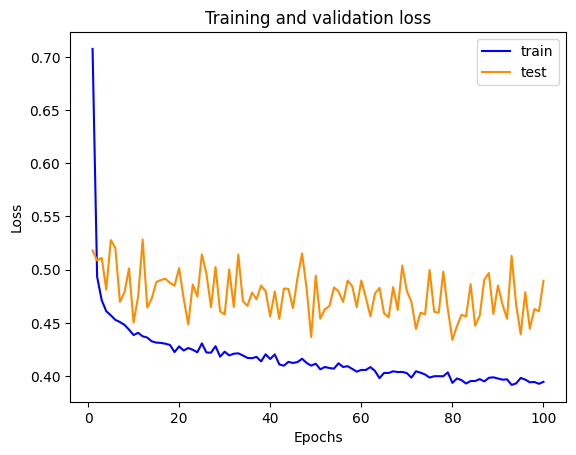

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='train')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'darkorange', label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

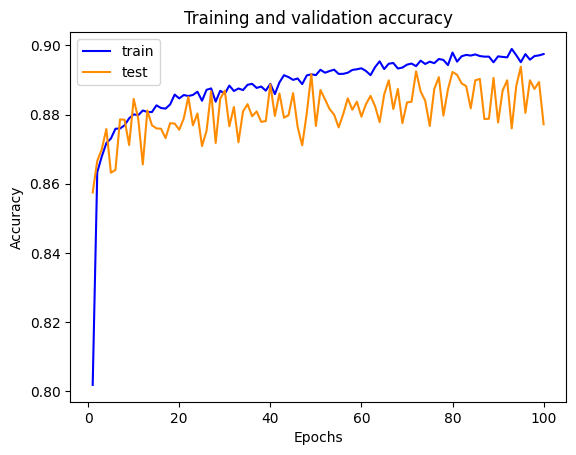

In [20]:
plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='train')
plt.plot(epochs, val_acc, 'darkorange', label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()